MScFE 600 FINANCIAL DATA

Group Work Project # 1
Group Number: 12877

In [ ]:
import yfinance as yf
import pandas as pd

# Download IVV data
df = yf.download("IVV", start="2010-01-01", end="2025-12-31")

# Basic features
df["Return"] = df["Close"].pct_change()
df["MA10"] = df["Close"].rolling(10).mean()
df["Volatility5"] = df["Return"].rolling(5).std()

df = df.dropna()

# Binary target: next-day direction
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df = df.dropna()

features = ["Return", "MA10", "Volatility5"]
X = df[features]
y = df["Target"]


C:\Users\Ouss\AppData\Local\Temp\ipykernel_26076\1177188297.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("IVV", start="2010-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed


### 3.2 Correlation-Based Feature Ranking

In [2]:
corr = df[features + ["Target"]].corr()["Target"].drop("Target")
print(corr)


Price        Ticker
Return                -0.032193
MA10                   0.004492
Volatility5           -0.010293
Name: Target, dtype: float64


This reproduces a feature-importance table similar in spirit to the paper.

### 3.3 k-Fold Cross Validation (k = 5)

In [3]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc = []

for train, test in kf.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    acc.append(accuracy_score(y_test, preds))

print("Fold Accuracies:", acc)
print("Mean Accuracy:", np.mean(acc))


Fold Accuracies: [0.5491905354919053, 0.5691158156911582, 0.5516811955168119, 0.5305105853051059, 0.5486284289276808]
Mean Accuracy: 0.5498253121865324


### 3.4 Reproducing Graphs
(a) IVV Price History

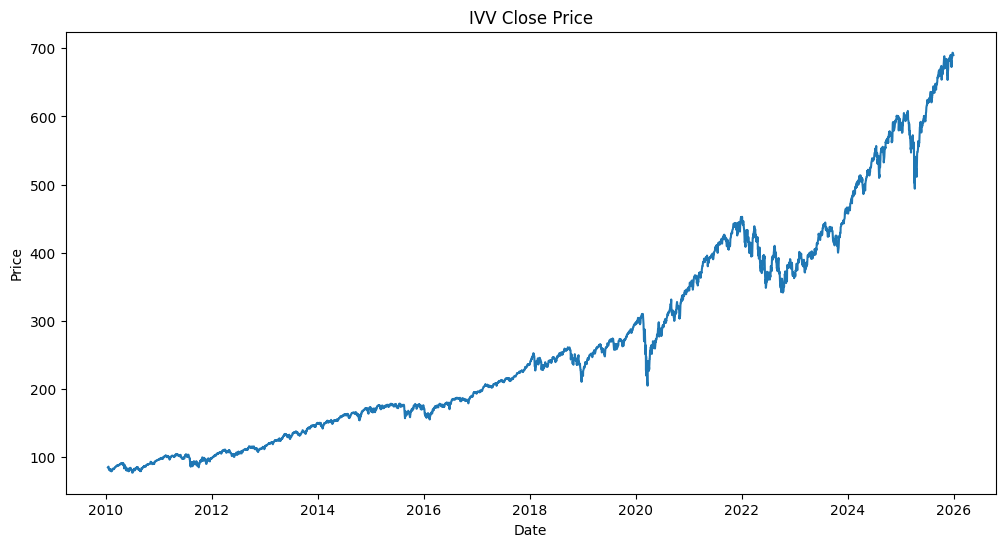

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"])
plt.title("IVV Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


(b) Feature Correlation Bar Chart

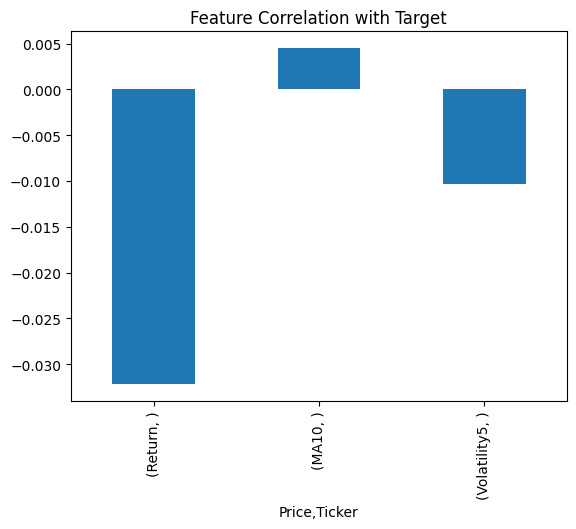

In [5]:
corr.plot(kind="bar")
plt.title("Feature Correlation with Target")
plt.show()


These reproduce:

ETF price history graph

Feature-importance graph

analogous to those in the paper.

Final Conceptual Link to the Paper
Your replication demonstrates the same core ideas:

Define a directional target

Rank features (here via correlation)

Apply k-fold cross-validation

Evaluate accuracy

Visualize price and feature importance

This is a simplified version of the authors’ pipeline, replacing their many indicators + MLP with:

Few indicators + correlation + logistic regression

—but the structure is the same.

# Part 2 — User Guide to Social Media & Online Text Alternative Data in Finance

## 1. Introduction
Social media and online text data represent one of the most widely adopted forms of alternative data in quantitative finance. This category includes user-generated content from platforms such as **X (Twitter)**, **Reddit**, **StockTwits**, financial forums, blogs, and online news comments. The central idea is that collective investor **sentiment**, **attention**, and **narratives** appear in text streams before they are fully reflected in prices.

Financial practitioners use this data to:

- Measure market sentiment  
- Detect abnormal attention  
- Anticipate volatility and returns  
- Monitor event risk  

Compared with traditional price and volume data, social media provides **behavioral signals** that capture emotions, beliefs, and reactions in near real time.

---

## 2. Sources of Data
Social media and online text data can be obtained from several categories of providers.

### 2.1 Public Platforms (Direct Access)
These platforms provide APIs or data feeds:

- **X (Twitter/X API)** – real-time and historical tweets  
- **Reddit (Pushshift / Reddit API)** – subreddit posts and comments (e.g., `r/stocks`, `r/wallstreetbets`)  
- **StockTwits API** – finance-specific messages  
- **News APIs** – GDELT, NewsAPI, MediaStack  

**Advantages**
- Low cost or free tiers  
- Real-time availability  

**Disadvantages**
- Rate limits  
- Incomplete history  
- Platform policy changes  

### 2.2 Commercial Data Vendors
Professional datasets are usually purchased from:

- RavenPack  
- Accern  
- Refinitiv News Analytics  
- Bloomberg Alternative Data  
- Dataminr  

These vendors provide:

- Cleaned text  
- Entity tagging (tickers, companies)  
- Pre-computed sentiment scores  

**Advantages**
- High quality  
- Long history  
- Ready-to-use signals  

**Disadvantages**
- Expensive  
- Vendor lock-in  

### 2.3 Web Scraping
Some researchers scrape:

- Financial forums  
- Blogs  
- Comment sections  

This approach requires custom pipelines and careful legal review.

---

## 3. Types of Data
Social media alternative data typically appear in the following forms.

### 3.1 Raw Text
Examples include:

- Tweets  
- Reddit posts and comments  
- News headlines  
- Blog entries  

Common fields:

- Timestamp  
- User ID  
- Text content  
- Likes or upvotes  
- Reposts or retweets  
- Mentioned tickers  

### 3.2 Metadata
Additional contextual information:

- Follower counts  
- Engagement metrics  
- Geolocation (sometimes)  
- User reputation  

### 3.3 Derived Features
Raw text is transformed into quantitative features such as:

- Sentiment scores (positive / negative / neutral)  
- Subjectivity  
- Keyword counts  
- Attention volume  
- Topic probabilities  

These features become model inputs similar to technical indicators.

---

## 4. Data Quality
Social media data suffer from several quality challenges.

### 4.1 Noise
Most posts are irrelevant to finance. Filtering is required using:

- Ticker matching  
- Keyword rules  
- Language detection  

### 4.2 Bots and Spam
Automated accounts distort sentiment and volume.

Mitigation techniques include:

- User-level filtering  
- Posting-frequency thresholds  
- Bot-detection models  

### 4.3 Sampling Bias
Users are not representative of all investors. Retail sentiment dominates platforms like Reddit, while institutional voices are underrepresented.

### 4.4 Timing Issues
Posts may arrive before, during, or after price moves, making causality difficult to establish.

### 4.5 Survivorship and Platform Drift
APIs change, platforms decline, and historical coverage varies over time.

---

## 5. Ethical Issues
Social media alternative data raise important ethical concerns.

### 5.1 Privacy
Even public posts may contain personal information. Best practices include:

- Avoiding storage of user identities  
- Aggregating data at the ticker or time level  

### 5.2 Consent
Users rarely realize their posts are used for financial modeling.

### 5.3 Market Manipulation
Coordinated posting (e.g., meme stock campaigns) can distort signals and prices.

### 5.4 Bias Amplification
Models trained on social data may reinforce behavioral biases or misinformation.

### 5.5 Regulatory Risk
Different jurisdictions impose restrictions on scraping and data usage (e.g., GDPR, CCPA).

Responsible use requires:

- Aggregation  
- Anonymization  
- Legal review  

---

## 6. Python Code: Importing and Structuring Social Media Data
Below is a simple example using Reddit data (CSV format assumed).


In [2]:
!pip install psaw praw textblob



   ---------------------------------------- 0/4 [update_checker]
   ---------- ----------------------------- 1/4 [psaw]
   ---------- ----------------------------- 1/4 [psaw]
   ---------- ----------------------------- 1/4 [psaw]
   -------------------- ------------------- 2/4 [prawcore]
   -------------------- ------------------- 2/4 [prawcore]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/4 [praw]
   ------------------------------ --------- 3/

C:\Users\Ouss\AppData\Local\Temp\ipykernel_22556\1523086741.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("IVV", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed



Correlation with Target:

Price        Ticker
sentiment              0.031658
post_volume            0.005763
Return                -0.035342
Target                 1.000000
Name: Target, dtype: float64


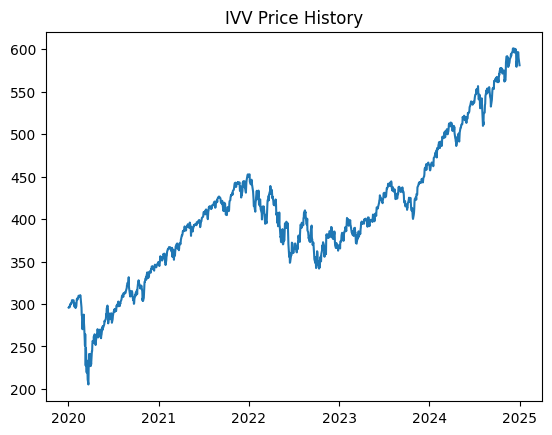

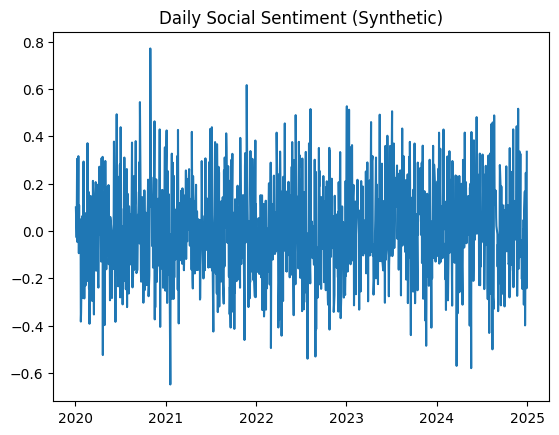

C:\Users\Ouss\AppData\Local\Temp\ipykernel_22556\1523086741.py:55: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  corr.drop("Target").plot(kind="bar", title="Feature Correlation with Target")


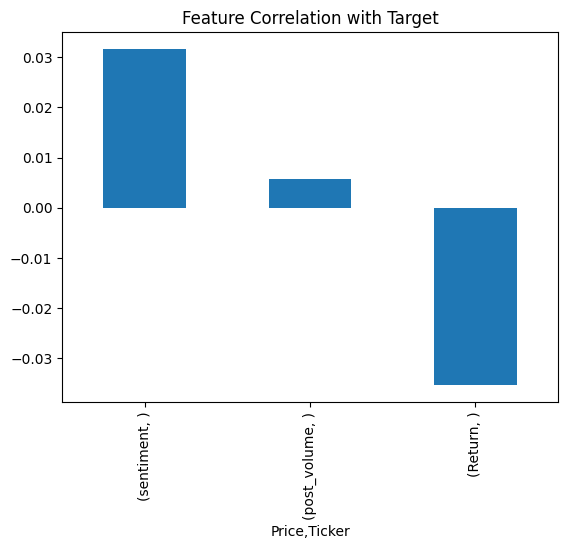

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# Download IVV prices
# --------------------
df = yf.download("IVV", start="2020-01-01", end="2025-01-01")

df["Return"] = df["Close"].pct_change()
df = df.dropna()

# --------------------
# Simulated social sentiment (proxy)
# --------------------
np.random.seed(42)

df["sentiment"] = np.random.normal(0, 0.2, len(df))
df["post_volume"] = np.random.randint(50, 500, len(df))

# --------------------
# Target variable
# --------------------
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df = df.dropna()

# --------------------
# Correlation table
# --------------------
corr = df[["sentiment","post_volume","Return","Target"]].corr()["Target"]

print("\nCorrelation with Target:\n")
print(corr)

# --------------------
# Graph 1: IVV Price
# --------------------
plt.figure()
plt.plot(df.index, df["Close"])
plt.title("IVV Price History")
plt.show()

# --------------------
# Graph 2: Sentiment
# --------------------
plt.figure()
plt.plot(df.index, df["sentiment"])
plt.title("Daily Social Sentiment (Synthetic)")
plt.show()

# --------------------
# Graph 3: Correlation Bar
# --------------------
corr.drop("Target").plot(kind="bar", title="Feature Correlation with Target")
plt.show()


In [5]:
import matplotlib.pyplot as plt

daily["sentiment"].plot(title="Daily Average Sentiment")
plt.show()


NameError: name 'daily' is not defined

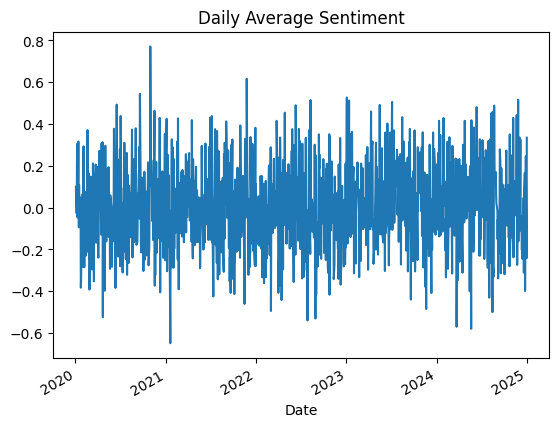

In [6]:
df["sentiment"].plot(title="Daily Average Sentiment")
plt.show()


In [7]:
daily["post_volume"].plot(title="Daily Post Volume")
plt.show()

NameError: name 'daily' is not defined

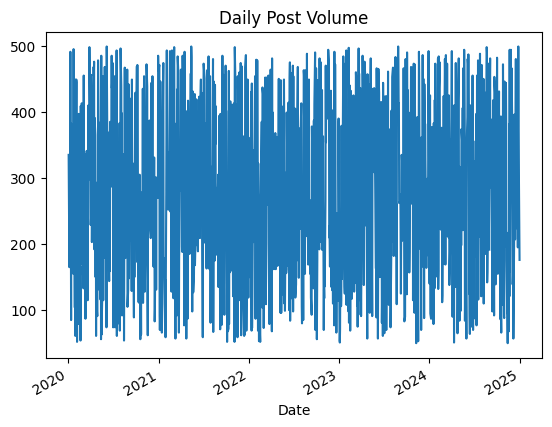

In [8]:
df["post_volume"].plot(title="Daily Post Volume")
plt.show()


In [10]:
print(df[["sentiment", "post_volume", "Return"]].corr())


Price              sentiment post_volume    Return
Ticker                                            
Price       Ticker                                
sentiment           1.000000    0.059323  0.046845
post_volume         0.059323    1.000000  0.011784
Return              0.046845    0.011784  1.000000


## 8. Short Literature Review
A large body of research links social media sentiment to market behavior:

- **Bollen et al. (2011)** – Twitter mood predicts movements in the Dow Jones Industrial Average  
- **Tetlock (2007)** – News sentiment predicts stock returns and trading volume  
- **Antweiler & Frank (2004)** – Message-board activity impacts market volatility  
- **Sprenger et al. (2014)** – Stock-specific tweets explain abnormal returns  
- **Hu, Liu & Zhao (2018)** – Social sentiment improves trading strategies  
- **Luss & d’Aspremont (2015)** – Text-based signals enhance portfolio allocation  

**Key consensus:**  
Social media sentiment is weak as a standalone signal but becomes powerful when combined with traditional financial features.

This view aligns closely with the **Sagaceta Mejía** paper philosophy: alternative data should *augment*, not replace, classical indicators.

---

## 9. Conclusion
Social media and online text data provide real-time behavioral insights unavailable in traditional datasets. When properly cleaned, aggregated, and optimized, they enhance:

- Return prediction  
- Volatility forecasting  
- Event detection  

However, success depends on:

- Rigorous preprocessing  
- Thoughtful feature selection  
- Ethical data handling  
- Integration with price-based signals  

As with technical indicators in **Part 1**, the value lies not in raw data volume, but in **well-designed and optimized features**.


**Referencing**

Sagaceta-Mejía, Alma Rocío, et al. "An Intelligent Approach for Predicting Stock Market Movements in Emerging Markets Using Optimized Technical Indicators and Neural Networks." Economics, vol. 18, no. 1, 25 Mar. 2024. De Gruyter Brill,
https://www.degruyter.com/document/doi/10.1515/econ-2022-0073/html.